In [1]:
import sys
import os

# Obtiene la ruta absoluta del directorio actual del notebook
current_dir = os.getcwd()

# Obtiene la ruta del directorio padre (donde está la carpeta 'src')
parent_dir = os.path.dirname(current_dir)

# Agrega el directorio padre al path de búsqueda de Python
sys.path.append(parent_dir)


--- CONFIGURACIÓN DE GRAFO ---
SCOPE: IMAGE
STRATEGY: SEQUENTIAL
--- CONFIGURACIÓN DE GRAFO ---
SCOPE: IMAGE
STRATEGY: SEQUENTIAL


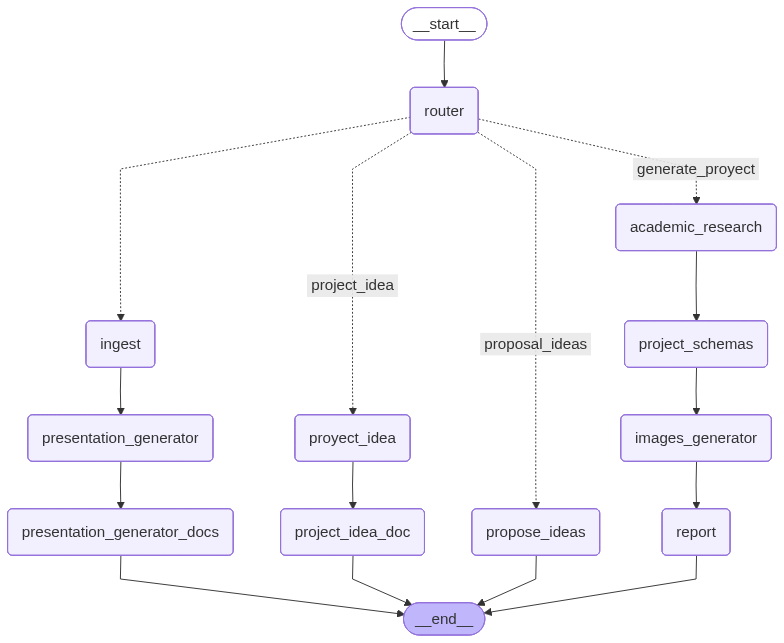

In [2]:
from src.agents.tech_surveillance.graph import agent 
from dotenv import load_dotenv

load_dotenv()  

from IPython.display import Image, display, Markdown

display(Image(agent.get_graph().draw_mermaid_png()))

### extrayendo la informacion de la convocatroia 

In [ ]:
from langchain_core.messages import HumanMessage

# --- DEFINIR EL INPUT ---
texto_convocatoria = """
Asunto: Intención de postulación - Convocatoria 966 Colombia Inteligente

Hola,

He decidido que vamos a aplicar a la "CONVOCATORIA COLOMBIA INTELIGENTE: CIENCIA Y TECNOLOGÍAS CUÁNTICAS E INTELIGENCIA ARTIFICIAL PARA LOS TERRITORIOS | Convocatoria 966". Esta es una excelente oportunidad para financiar nuestro proyecto de Investigación Aplicada, Desarrollo Tecnológico e Innovación (CTeI).

La convocatoria está dirigida específicamente a grupos de investigación, academia y startups como la nuestra que estén desarrollando soluciones disruptivas. El objetivo principal es impulsar proyectos en tecnologías cuánticas e Inteligencia Artificial que generen un impacto medible y ayuden a cerrar brechas tecnológicas en los territorios del país.

Entre los beneficios que obtendríamos al participar están:

El fomento de la transferencia tecnológica.

El desarrollo de talento especializado.

El fortalecimiento de nuestra vinculación con la industria y el sector público.

Aunque las fechas de inicio y cierre, así como el monto exacto de financiamiento, aún aparecen como "No especificados", debemos estar atentos y tener lista la propuesta.

Puedes consultar más detalles directamente en el enlace oficial:
https://minciencias.gov.co/convocatorias/convocatoria-colombia-inteligente-ciencia-y-tecnologias-cuanticas-e-inteligencia

"""

initial_state = {
    # El mensaje del usuario con la info
    "messages": [HumanMessage(content=texto_convocatoria)],
    
    # IMPORTANTE: Aquí decides la ruta. 
    # Opciones según tu código: "ingest", "proposal_ideas", "project_idea"
    "route_decision": "ingest" 
}

# --- INVOCAR EL AGENTE ---
print("🚀 Iniciando ejecución del grafo...")
output_state = await agent.ainvoke(initial_state)

# --- VER RESULTADOS ---
print("\n✅ Ejecución finalizada.")

# 1. Ver la respuesta del chat
print(f"\n🤖 Respuesta del Bot: {output_state['messages'][-1].content}")

# 2. Ver la información extraída (Pydantic object)
if output_state.get("call_info"):
    print("\n📄 Info Extraída (CallInfo):")
    print(f"Título: {output_state['call_info'].title}")
    print(f"Objetivo: {output_state['call_info'].objective}")
    print(f"Funding: {output_state['call_info'].funding}")
    print(f"URL: {output_state['call_info'].url}")
else:
    print("\n⚠️ No se extrajo información de convocatoria.")

🚀 Iniciando ejecución del grafo...


c:\Users\dan20\Documents\Full_Agent_CTM\venv\Lib\site-packages\pydantic\v1\main.py:1054: UserWarning: LangSmith now uses UUID v7 for run and trace identifiers. This warning appears when passing custom IDs. Please use: from langsmith import uuid7
            id = uuid7()
Future versions will require UUID v7.
  input_data = validator(cls_, input_data)


--- Ejecutando Nodo: Ingesta de Convocatoria ---
🎨 INICIANDO AGENTE DE INVESTIGACIÓN Y PRESENTACIÓN...
📝 Mensaje final del agente recibido. Procesando...
✅ Agente finalizado. Longitud respuesta: 14886 caracteres
[DATOS_GENERALES]
<ul>
  <li><strong>Entidad:</strong> Ministerio de Ciencia, Tecnología e Innovación (Minciencias)</li>
  <li><strong>Número:</strong> 966</li>
  <li><strong>Apertura:</strong> 25 de abril de 2025</li>
  <li><strong>Cierre:</strong> 18 de junio de 2025 (Según Adenda No. 2)</li>
  <li><strong>Resumen:</strong> La Convocatoria Colombia Inteligente busca fortalecer la investigación aplicada, el desarrollo tecnológico y la innovación en los campos de las ciencias y tecnologías cuánticas, así como la Inteligencia Artificial. Su objetivo principal es generar un impacto medible que contribuya al desarrollo ambiental, social y económico de las regiones colombianas, en línea con la Política de Investigación e Innovación Orientada por Misiones.</li>
</ul>
[/DATOS_GENERAL

### generando las ideas de propuesta 

In [4]:
# Reutilizamos el estado que salió del paso anterior (que ya tiene call_info)
next_state_input = output_state.copy()

# Cambiamos la decisión para ir por otro camino
next_state_input["route_decision"] = "proposal_ideas" 

# Invocamos de nuevo
output_ideas = agent.invoke(next_state_input)

# --- VISUALIZACIÓN MEJORADA ---

ideas_response = output_ideas.get("proposal_ideas")

if ideas_response and hasattr(ideas_response, 'ideas') and ideas_response.ideas:
    
    # Creamos un string acumulativo con formato Markdown
    md_output = f"# 💡 Ideas de Proyecto Generadas ({len(ideas_response.ideas)})\n\n"
    md_output += "---\n"

    for i, idea in enumerate(ideas_response.ideas, 1):
        # Título de la idea
        md_output += f"### {i}. {idea.idea_title}\n"
        
        # Descripción
        md_output += f"**📖 Descripción:**\n{idea.idea_description}\n\n"
        
        # Objetivos (asumiendo que es una lista)
        md_output += "**🎯 Objetivos SMART:**\n"
        if idea.idea_objectives:
            for obj in idea.idea_objectives:
                md_output += f"- {obj}\n"
        else:
            md_output += "- *No se definieron objetivos específicos.*\n"
        
        md_output += "\n---\n" # Separador entre ideas

    # Renderizamos todo el Markdown de una vez
    display(Markdown(md_output))

else:
    print("⚠️ No se encontraron ideas en el estado 'proposal_ideas'.")
    # Imprimimos el estado crudo por si acaso hay un error
    print(output_ideas.get("proposal_ideas"))

--- Ejecutando Nodo: Generación de Ideas de Proyecto ---


# 💡 Ideas de Proyecto Generadas (5)

---
### 1. Sistema Inteligente de Detección Temprana de Enfermedades Agrícolas para Pequeños Productores
**📖 Descripción:**
Este proyecto busca resolver la falta de herramientas avanzadas para la detección de enfermedades y plagas en cultivos de pequeños agricultores en territorios remotos. Proponemos desarrollar una aplicación móvil con IA y un sistema de captura de imágenes con drones para identificar tempranamente afecciones en cultivos, ofreciendo recomendaciones personalizadas. Esto incrementará la productividad agrícola, reducirá el uso de pesticidas y empoderará a los agricultores locales con tecnología accesible.

**🎯 Objetivos SMART:**
- Desarrollar un modelo de IA con una precisión del 90% en la identificación de al menos 5 enfermedades comunes en cultivos de la región objetivo, en los primeros 9 meses del proyecto.
- Implementar una aplicación móvil intuitiva que permita a los agricultores cargar imágenes y recibir diagnósticos y recomendaciones en menos de 30 segundos, para el mes 12.
- Realizar un piloto con al menos 50 pequeños agricultores en dos territorios seleccionados, logrando una reducción del 15% en pérdidas de cultivos por enfermedades en un ciclo de cosecha, para el mes 18.
- Capacitar a 100 agricultores y técnicos locales en el uso del sistema, asegurando una tasa de adopción del 70% entre los participantes del piloto, para el mes 15.
- Establecer alianzas con 2 entidades agrícolas locales para la sostenibilidad y escalabilidad del sistema post-proyecto, antes del mes 18.

---
### 2. Plataforma de Monitoreo Inteligente de Infraestructura Crítica para Territorios Remotos
**📖 Descripción:**
La infraestructura en territorios remotos de Colombia sufre de falta de inspección y mantenimiento oportuno, generando riesgos y altos costos. Este proyecto propone una plataforma con IA que integre imágenes satelitales, datos de drones y sensores IoT para monitorear la integridad estructural de carreteras y puentes. La solución predecirá fallas, priorizará el mantenimiento y optimizará recursos, mejorando la seguridad pública y extendiendo la vida útil de la infraestructura vital.

**🎯 Objetivos SMART:**
- Diseñar y desarrollar un prototipo funcional de la plataforma de monitoreo que integre datos de al menos 3 fuentes (satélite, dron, IoT) con un módulo de IA para detección de anomalías, en los primeros 9 meses.
- Validar la capacidad del sistema para identificar al menos 3 tipos de defectos estructurales (grietas, deformaciones) con una precisión del 85% en un entorno controlado, para el mes 12.
- Implementar un piloto de la plataforma en 50 km de carretera y 2 puentes en un territorio seleccionado, demostrando una reducción del 20% en el tiempo de inspección manual, para el mes 16.
- Generar un informe de recomendaciones de mantenimiento predictivo con una anticipación de al menos 3 meses para el 70% de las anomalías detectadas en el piloto, para el mes 18.
- Establecer un acuerdo de colaboración con una entidad gubernamental de infraestructura para la evaluación y potencial adopción de la plataforma, antes del mes 18.

---
### 3. Asistente Virtual Inteligente para la Optimización de Servicios Públicos Territoriales
**📖 Descripción:**
Los ciudadanos en áreas remotas enfrentan barreras geográficas y procesos burocráticos ineficientes para acceder a servicios públicos. Este proyecto desarrollará un asistente virtual con IA (chatbot/voicebot) integrado en una plataforma en la nube, que facilitará el acceso a información gubernamental, trámites y solicitudes, adaptado a dialectos locales. Mejorará el acceso ciudadano, reducirá la carga administrativa y aumentará la eficiencia gubernamental en territorios desatendidos.

**🎯 Objetivos SMART:**
- Desarrollar un prototipo de asistente virtual con capacidades de procesamiento de lenguaje natural (NLP) para responder al menos 100 preguntas frecuentes sobre 3 servicios públicos clave, en los primeros 6 meses.
- Integrar el asistente virtual en una plataforma web y móvil accesible, logrando una tasa de resolución de consultas del 75% sin intervención humana, para el mes 10.
- Realizar un piloto en 2 municipios de un territorio seleccionado, con la participación de al menos 500 ciudadanos, logrando una mejora del 30% en la satisfacción del usuario con el acceso a la información, para el mes 15.
- Reducir en un 25% el tiempo de respuesta promedio para solicitudes de información en las entidades públicas participantes en el piloto, para el mes 18.
- Capacitar a 20 funcionarios públicos en la administración y mejora continua del asistente virtual, asegurando su sostenibilidad operativa, antes del mes 18.

---
### 4. Plataforma Logística Inteligente para la Cadena de Suministro de Pymes Rurales
**📖 Descripción:**
Las PYMES rurales en Colombia luchan con cadenas de suministro ineficientes, resultando en altos costos y acceso limitado a mercados. Este proyecto propone una plataforma logística con IA que utilice analítica predictiva y algoritmos de optimización de rutas para mejorar la gestión de inventarios y la eficiencia del transporte. La solución reducirá costos logísticos, ampliará el alcance de mercado para productos locales y fomentará el crecimiento económico en regiones rurales.

**🎯 Objetivos SMART:**
- Diseñar y desarrollar un módulo de optimización de rutas basado en IA que reduzca los costos de transporte en un 15% para una red de distribución simulada, en los primeros 8 meses.
- Implementar un sistema de gestión de inventarios predictivo que logre una reducción del 20% en el exceso de stock y desabastecimiento para productos agrícolas seleccionados, para el mes 12.
- Realizar un piloto con al menos 10 PYMES rurales en un territorio específico, demostrando una mejora del 25% en la eficiencia de entrega y recolección de productos, para el mes 16.
- Desarrollar un panel de control accesible para las PYMES que muestre métricas clave de la cadena de suministro y recomendaciones de optimización, para el mes 14.
- Establecer 3 alianzas estratégicas con operadores logísticos o asociaciones de productores para la expansión y adopción de la plataforma, antes del mes 18.

---
### 5. Sistema de Monitoreo Ambiental con IA para la Protección de Ecosistemas Territoriales
**📖 Descripción:**
La deforestación, minería ilegal y contaminación amenazan la biodiversidad y recursos naturales en territorios colombianos, a menudo sin detección oportuna. Este proyecto desplegará un sistema de monitoreo ambiental con IA que utilizará imágenes satelitales, sensores acústicos y vigilancia con drones para detectar y alertar a las autoridades sobre actividades ilegales y cambios ambientales en tiempo real. Protegerá ecosistemas, combatirá crímenes ambientales y apoyará la gestión sostenible de recursos.

**🎯 Objetivos SMART:**
- Desarrollar un modelo de IA para la detección de deforestación y cambios en el uso del suelo a partir de imágenes satelitales con una precisión del 90%, en los primeros 9 meses.
- Integrar datos de al menos 5 sensores acústicos y 2 drones para identificar patrones de actividad ilegal (ej. tala, minería) con una tasa de falsos positivos inferior al 10%, para el mes 12.
- Implementar un sistema de alerta temprana que notifique a las autoridades competentes en menos de 2 horas tras la detección de una anomalía crítica, para el mes 14.
- Realizar un piloto en un área protegida de al menos 100 km² en un territorio seleccionado, logrando una reducción del 15% en la incidencia de actividades ilegales detectadas, para el mes 18.
- Capacitar a 15 guardaparques y funcionarios ambientales en el uso y mantenimiento del sistema, asegurando su operatividad y transferencia de conocimiento, antes del mes 17.

---
